In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar as root
import scipy.io

In [12]:
# Declaração dos parâmetros:
Vw_nom = 12
Vw_wmax = 11.175720428894175
R = 37.5
A = np.pi*R**2
par = 1.225
lbd_opt = 6.3249

# Função da velocidade angular da máquina:
def Wrm(Vw):
  return lbd_opt*Vw/R

# Função do coeficiente de potência:
def Cp(LBD,beta):
  C = [0.22,116,0.4,0,0,5,12.5,0.08,0.035]
  alpha = (1 / (LBD + beta * C[7]) - C[8] / (beta ** 3 + 1))**-1
  Cp = C[0] * (C[1] / alpha - C[2] * beta - C[3] * beta ** C[4] - C[5]) * np.exp(-C[6] / alpha)
  return Cp

# Função da potência da turbina:
def Ptur(Vw, Wtur, beta):
  LBD = R * Wtur/Vw
  Ptur = 1 / 2 * par * A *Cp(LBD, beta)* Vw **3
  return Ptur

Wtur_nom = Wrm(Vw_wmax)
Ptur_nom = Ptur(Vw_nom, Wtur_nom, 0)

# Função objetivo:
def F(Vw):
  def f(beta):
    return Ptur_nom- Ptur(Vw,Wtur_nom,beta)
  return f

# Declaração dos vetores necessários:
Vw_vet = np.linspace(12,25,30)
beta_vet = np.zeros_like(Vw_vet)
v0 = 0

# Chamando solver:
for k,v in enumerate(Vw_vet):
  sol = root(F(v), bracket=(0,35), method='bisect')
  beta_vet[k] = sol.root
  v0 = beta_vet[k]

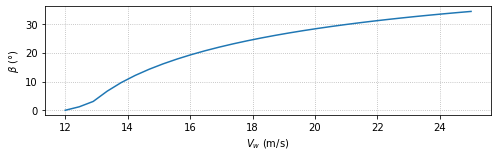

In [13]:
# Declaração da Figura:
fig, ax = plt.subplots()
fig.set_size_inches(8, 2)

ax.plot(Vw_vet, beta_vet)
ax.set(xlabel='$V_w$ (m/s)',    ylabel='$\\beta$ (°)')
ax.grid(True, linestyle='dotted')

fig.savefig("reg4.pdf", bbox_inches='tight', pad_inches=0)

In [10]:
# Exportando Loockup table compatível com a linguagem Modelica
mybeta = np.array([(Vw_vet-12).tolist(), beta_vet.tolist()]).T
scipy.io.savemat('mybeta.mat', {'beta':mybeta})